# Homework 05
### Paola M Hunt

In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

## Problem 1: Sample Mean and Variance

In this problem, I will use NumPy to calculate sample mean and variance of a data set in two ways:
1. First using numpy to perform the calculations indicated by the formulas for these values, and
2. Then using built-in NumPy functions for the mean and variance.

In [2]:
x = np.array([10, 16, 26, 12, 17, 22, 14, 12, 21, 16])
n = len(x)

mean = (np.sum(x))/n
diff = np.array([x - mean])
var = (np.sum(diff**2)/(n-1))

print(f'Sample Mean: {mean:>8} \nSample Variance: {var:>3}')


Sample Mean:     16.6 
Sample Variance: 25.6


In [3]:
mean_np = np.mean(x)
var_np = np.var(x, ddof=1)

print(f'Sample Mean: {mean_np:>8} \nSample Variance: {var_np:>3}')

Sample Mean:     16.6 
Sample Variance: 25.6


## Problem 2: Scoring a Regression Model

In this problem, I will define a funtion that will calculate the sum of squared error of a regression model.

In [4]:
def find_sse(true_y, pred_y):
    sse_score = np.sum((true_y-pred_y)**2)
    return sse_score

In [5]:
true_y = np.array([22.1, 17.9, 16.5, 14.3, 19.8, 23.7, 22.0, 18.4, 25.7, 19.2])
pred_1 = np.array([21.4, 16.7, 17.9, 12.1, 22.1, 25.1, 21.7, 19.3, 23.4, 19.9])
pred_2 = np.array([20.7, 18.1, 16.9, 13.6, 21.9, 24.8, 20.3, 21.1, 24.8, 18.4])

sse_1 = find_sse(true_y, pred_1)
sse_2 = find_sse(true_y, pred_2)

print(f'Model 1 SSE: {round(sse_1, 2)} \nModel 2 SSE: {round(sse_2,2)}')

Model 1 SSE: 22.66 
Model 2 SSE: 19.9


## Problem 3: Scoring a Classification Model

In this problem, I will define a function that finds the accuracy of a model. Then I will test the function with two different models.

In [6]:
def find_accuracy(true_y, pred_y):
    accuracy = (np.sum(true_y == pred_y)) / (len(true_y))
    return accuracy

In [7]:
true_diag = np.array(['P', 'P', 'N', 'N', 'P', 'N', 'N', 'N', 'P', 'N', 'N', 'N', 'N', 'P', 'P', 'N', 'N', 'N', 'N', 'N'])
pred_diag = np.array(['N', 'P', 'N', 'P', 'P', 'N', 'P', 'N', 'P', 'N', 'N', 'N', 'P', 'P', 'P', 'N', 'N', 'N', 'P', 'N'])

model_accuracy = find_accuracy(true_diag, pred_diag)

print(f'Model Accuracy: {model_accuracy}')


Model Accuracy: 0.75


In [8]:
true_labels = np.array(['dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat'])
pred_labels = np.array(['dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat'])

model_accuracy2 = find_accuracy(true_labels, pred_labels)

print(f'Model Accuracy: {model_accuracy2}')

Model Accuracy: 0.875


## Problem 4: Classification Report

I will define a function that will print several metrics used to evaluate the performance of a classification model based on the supplied values of true_y and pred_y. Then I will test the function usind different models.

In [9]:
def classification_report(true_y, pred_y):
    classes = np.unique(true_y)
    negative_class = classes[0]
    positive_class = classes[1]
    
    model_accuracy3 = find_accuracy(true_y, pred_y)
    
    TP = np.sum((pred_y==positive_class)&(true_y==positive_class))
    FP = np.sum((pred_y==positive_class)&(true_y==negative_class))
    TN = np.sum((pred_y==negative_class)&(true_y==negative_class))
    FN = np.sum((pred_y==negative_class)&(true_y==positive_class))
    
    pos_precision = round((TP /(TP+FP)), 4)
    pos_recall = round((TP / (TP+FN)),4)
    neg_precision = round((TN / (TN+FN)),4)
    neg_recall = round((TN / (TN+FP)),4)
    
    print('Positive Class:     ', positive_class, 
          '\nNegative Class:     ', negative_class,
          '\n',
          '\nAccuracy:           ', model_accuracy3,
          '\nPositive Precision: ', pos_precision,
          '\nPositive Recall:    ', pos_recall,
          '\nNegative Precision: ', neg_precision,
          '\nNegative Recall:    ', neg_recall
         )

In [10]:
classification_report(true_diag,pred_diag) 

Positive Class:      P 
Negative Class:      N 
 
Accuracy:            0.75 
Positive Precision:  0.5556 
Positive Recall:     0.8333 
Negative Precision:  0.9091 
Negative Recall:     0.7143


In [11]:
classification_report(true_labels, pred_labels) 

Positive Class:      dog 
Negative Class:      cat 
 
Accuracy:            0.875 
Positive Precision:  0.8333 
Positive Recall:     0.9091 
Negative Precision:  0.9167 
Negative Recall:     0.8462


## Problem 5: Transformation of Random Variables

In this problem, I will calculate the sample mean and sample standard deviation of both X and Y.

In [12]:
np.random.seed(1)
X = np.array([np.random.normal(loc=0, scale=0.4, size=25000)])

Y = m.e ** X

meanx = round(np.mean(X),4)
devx = round(np.std(X, ddof=1),4)
meany = round(np.mean(Y),4)
devy = round(np.std(Y, ddof=1),4)

print(f'Sample Mean of X: {meanx:>10} \nSample Std Dev of X: {devx:>7} \nSample Mean of Y: {meany:>10} \nSample Std Dev of Y: {devx:>7}')

Sample Mean of X:     0.0025 
Sample Std Dev of X:  0.4002 
Sample Mean of Y:     1.0862 
Sample Std Dev of Y:  0.4002


I will now create histograms to get a visual sense of the distributions of X and Y.

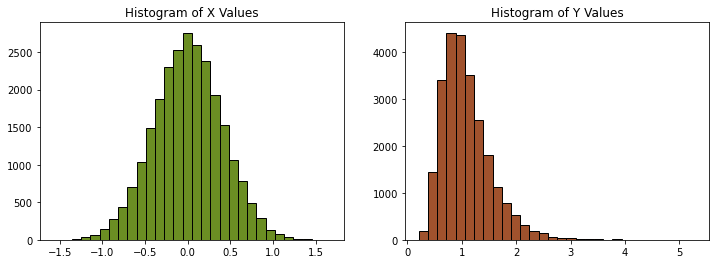

In [13]:
plt.figure(figsize=[12,4])

plt.subplot(1,2,1)
plt.hist(list(X), edgecolor='k', color ='olivedrab', bins=30)
plt.title('Histogram of X Values')

plt.subplot(1,2,2)
plt.hist(list(Y), edgecolor='k', color = 'sienna',  bins=30)
plt.title('Histogram of Y Values')


plt.show()

Finally, I will use our sampled values and numpy comparisons to estimate probabilities relating to the random variable 𝑌.

In [14]:
lessthanhalf = round(np.mean(Y < 0.5), 4)
lessthanone = round(np.mean((Y < 1)), 4)
lessthantwo = round(np.mean((Y < 2)), 4)

print(f'Probability that Y is less than 0.5: {lessthanhalf:>5}\nProbability that Y is less than 1.0: {lessthanone:>5} \nProbability that Y is less than 2.0: {lessthantwo:>5}')


Probability that Y is less than 0.5: 0.041
Probability that Y is less than 1.0: 0.4969 
Probability that Y is less than 2.0: 0.9574


## Problem 6: Stochastic Linear Relationships

In this exercise, I will create arrays representing samples collected from two variables 𝑋 and 𝑌 that satisfy the following stochastic linear relationship: 𝑌=5.1+0.9⋅𝑋+𝜀

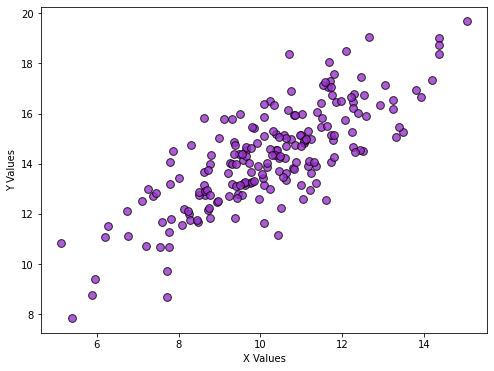

In [15]:
np.random.seed(1)
x_vals = np.array([np.random.normal(loc=10, scale=2, size=200)])
errors = np.array([ np.random.normal(loc=0, scale=1.2, size=200)])
y_vals = 5.1 + ( 0.9 * x_vals) + errors

plt.figure(figsize=[8,6])

plt.scatter(x=x_vals, y=y_vals, s=60, alpha=0.8, 
            color='darkorchid', edgecolor='black')
plt.xlabel('X Values')
plt.ylabel('Y Values')

plt.show()

I will now calculate the correlation between 𝑋 and 𝑌.

In [16]:
diff_x = np.array([x_vals - np.mean(x_vals)])
diff_y = np.array([y_vals - np.mean(y_vals)])

topr = np.sum(diff_x * diff_y)
bottomr = m.sqrt(np.sum(diff_x**2)*np.sum(diff_y**2))

r = topr / bottomr
print('Correlation between X and Y:', round(r,4))

Correlation between X and Y: 0.7861


## Problem 7: Relationship between Life Expectancy and Per Capita GDP

In [17]:
import pandas as pd
df = pd.read_csv('data/gapminder_data.txt', sep='\t')
country = df.country.values
year = df.year.values
continent = df.continent.values
population = df.population.values
life_exp = df.life_exp.values
pcgdp = df.gdp_per_cap.values
gini = df.gini.values
df = None

In [18]:
continent_list =['africa', 'americas', 'asia', 'europe']
color_list = ['green', 'red', 'orange', 'blue']

Now I will create a scatter plot displaying the relationship between the the natural log of per capita gdp and life expectancy for 2018 data, with the color of points in the plot determined by the continent information. 

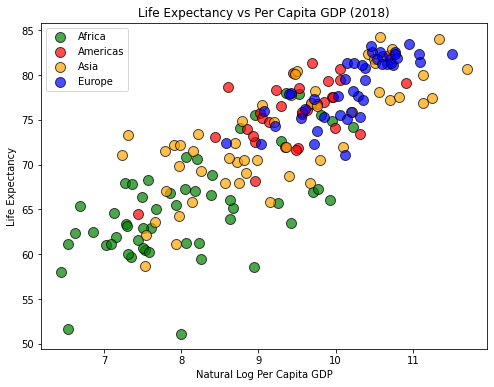

In [19]:
plt.figure(figsize=[8,6])

for j in range(0, len(continent_list)):
    current_continent = continent_list[j]
    sel = (year==2018) & (continent == current_continent)
    temp_nlpcgdp = np.log(pcgdp)
    temp_life_exp = life_exp  
    plt.scatter(x=temp_nlpcgdp[sel], y=temp_life_exp[sel], s=100, alpha=0.7, color=color_list[j], edgecolor='black', label=current_continent.title())

plt.xlabel('Natural Log Per Capita GDP')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs Per Capita GDP (2018)')
plt.legend()
plt.show()
        
   
  


I will now generate a figure that separates the points for each of the continents into its own subplot.

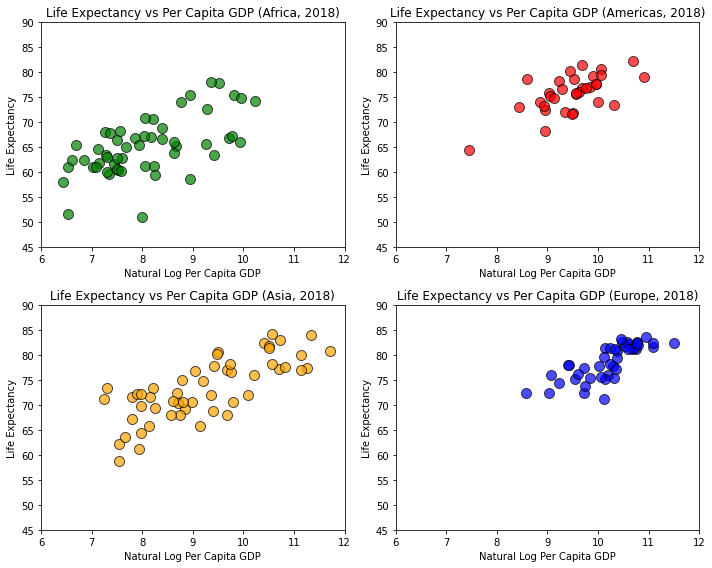

In [20]:
plt.figure(figsize=[10,8])

for j in range(0, len(continent_list)):
    plt.subplot(2,2,j+1)
    
    current_continent = continent_list[j]
    sel = (year==2018) & (continent == current_continent)
    temp_nlpcgdp = np.log(pcgdp)
    temp_life_exp = life_exp  
    
    plt.scatter(x=temp_nlpcgdp[sel], y=temp_life_exp[sel], s=100, alpha=0.7, color=color_list[j], edgecolor='black')

    plt.xlim([6, 12])
    plt.ylim([45, 90])
    plt.xlabel('Natural Log Per Capita GDP')
    plt.ylabel('Life Expectancy')
    plt.title('Life Expectancy vs Per Capita GDP (' + current_continent.title() + ', 2018)')

plt.tight_layout()
plt.show()

## Problem 8: Trends by Country

In this exercise, I will create line plots representing the change in population and life expectancy for selected countries over time.

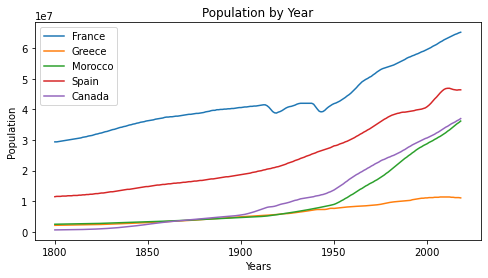

In [21]:
my_countries = ['France','Greece', 'Morocco', 'Spain', 'Canada']

plt.figure(figsize=[8,4])

for i in range(0, len(my_countries)):
    current_cty = my_countries[i]
    populationpercountry = population[country == current_cty] 
    yearpercoutnry = year[country == current_cty]
    
    plt.plot(yearpercoutnry, populationpercountry, label=current_cty)
    
plt.legend()
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Population by Year')
    
plt.show()

    

Now I will repeat the steps from the previous code cell, but replacing population with life_exp. I used 5 different countries in Africa.

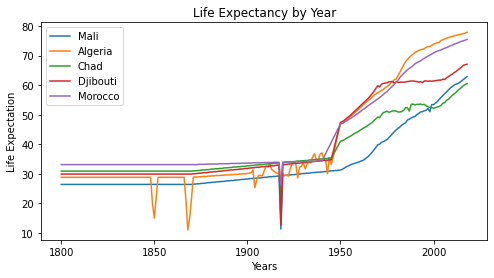

In [22]:
african_countries = ['Mali', 'Algeria', 'Chad', 'Djibouti', 'Morocco']

plt.figure(figsize=[8,4])

for i in range(0, len(african_countries)):
    current_cty2 = african_countries[i]
    lifexppercountry = life_exp[country == current_cty2] 
    yearpercoutnry = year[country == current_cty2]
    
    plt.plot(yearpercoutnry, lifexppercountry, label=current_cty2)
    
plt.legend()
plt.xlabel('Years')
plt.ylabel('Life Expectation')
plt.title('Life Expectancy by Year')
    
plt.show()
